<a href="https://colab.research.google.com/gist/gabriel-curcio/8fb99b8ab736b351058f6c1d0da3b75f/hw_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


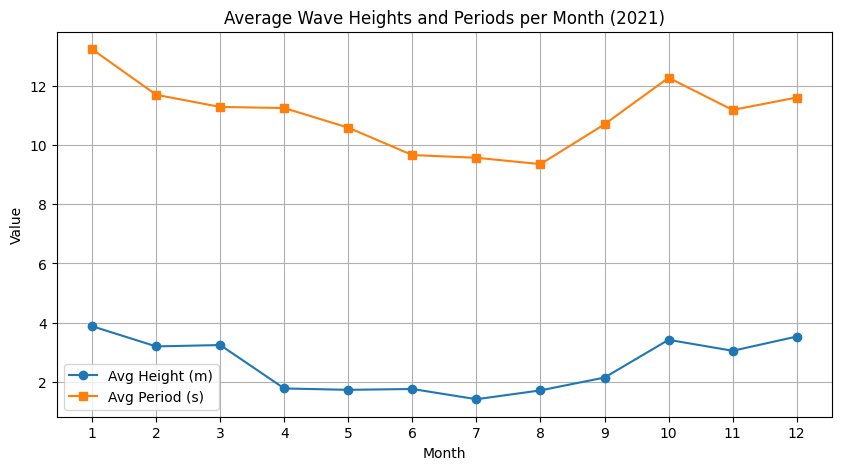

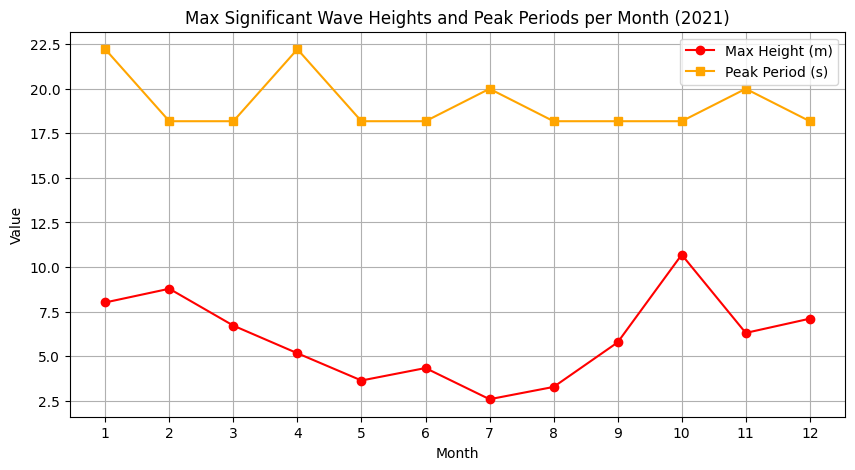

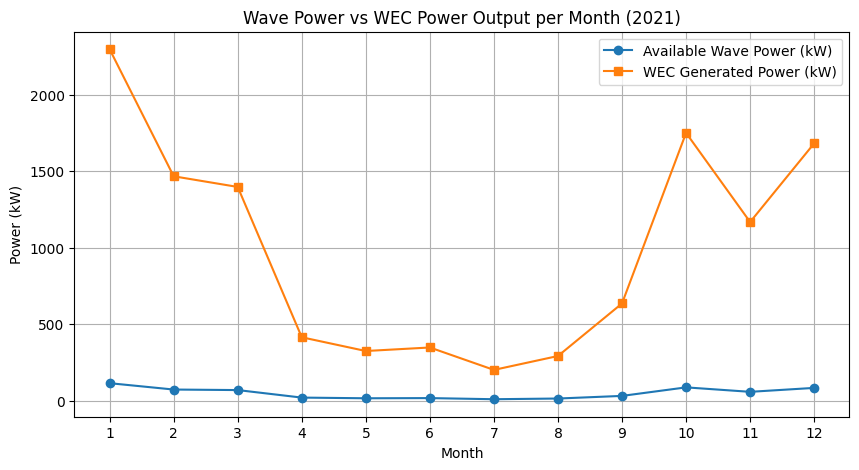

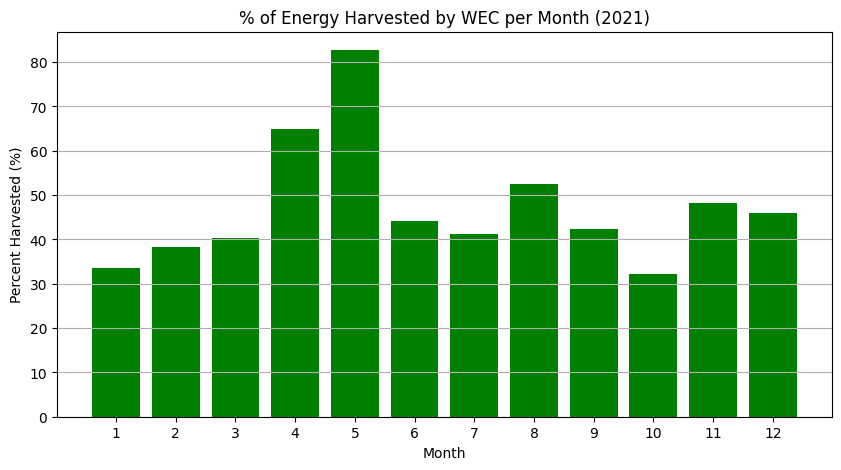

in month 1 the average wave height is 3.8786539768864716 m, and the max wave height is 8.01 m.
in month 2 the average wave height is 3.1960587792012056 m, and the max wave height is 8.78 m.
in month 3 the average wave height is 3.2426641651031893 m, and the max wave height is 6.71 m.
in month 4 the average wave height is 1.7744265734265734 m, and the max wave height is 5.16 m.
in month 5 the average wave height is 1.7281368563685637 m, and the max wave height is 3.63 m.
in month 6 the average wave height is 1.7563859649122806 m, and the max wave height is 4.33 m.
in month 7 the average wave height is 1.4104851752021563 m, and the max wave height is 2.58 m.
in month 8 the average wave height is 1.7095622895622895 m, and the max wave height is 3.27 m.
in month 9 the average wave height is 2.142936673625609 m, and the max wave height is 5.77 m.
in month 10 the average wave height is 3.41926251691475 m, and the max wave height is 10.69 m.
in month 11 the average wave height is 3.0480194579

In [5]:
#######################################################################
# Program Filename: HW_4B
# Author: Gabriel Curcio
# Date: 6/4/25
# Description: wave energy harvesting
# Input: buoy data (significant wave height, peak period, and month)
# Output: Printed monthly wave statistics, plots of wave height/period, power data,
# and WEC harvesting efficiency
#######################################################################
#######################################################################
# Function: main (executed at runtime, not explicitly defined)
# Parameters: None
# Return values: None
# Pre-Conditions: file must exist
# Post-Conditions: Displays 4 plots and prints statistics for each month
#######################################################################

# import libraries and called functions

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
os.chdir('/content/drive/MyDrive/Colab Notebooks/ENGR103 2024')
filename = '46248h2021.csv'
data = pd.read_csv(filename)
import wavey as waves

# Extract relevant columns from dataset
WH = data.iloc[:, 5]        # Significant Wave Height
Per = data.iloc[:, 6]       # Peak Period
month = data.iloc[:, 1]     # Month (1–12)

# set up storing structures

power = np.zeros(len(WH))
avg_power = []
max_height = []
avg_height = []
max_power = []
max_period = []
avg_period = []

# arrays for plots and outputs

month_names = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
month_array = [1,2,3,4,5,6,7,8,9,10,11,12]
array_found = [771.14, 562.54, 562.54, 268.83, 268.83, 153.47, 83.12, 153.47, 268.83, 562.54, 562.54, 771.14]

# Power calculation

for i in range(len(WH)):
  power[i] = waves.calc_incoming_power(WH[i], Per[i])

# For looping through months to filter data and calculate max and average values

for x in range(len(month_array)):
  monthly_height = waves.find_monthly_data(WH, month, x+1)
  monthly_power = waves.find_monthly_data(power, month, x+1)
  monthly_period = waves.find_monthly_data(Per, month, x+1)
  uuu = waves.max_avg_hgt_pwr_period(monthly_height, monthly_power, monthly_period)
  max_height.append(uuu[0])
  avg_height.append(uuu[1])
  max_power.append(uuu[2])
  avg_power.append(uuu[3])
  max_period.append(uuu[4])
  avg_period.append(uuu[5])

# printing to check data is correct

# print(max_height)
# print(avg_height)
# print(max_power)
# print(avg_power)
# print(max_period)
# print(avg_period)
# print(array_found)

isit, percents = waves.wec_power(avg_power, array_found) #used to calculate WEC power and percent efficiency

# print(isit)
# print(percents)

# Plot for average wave height and period per month

plt.figure(figsize=(10, 5))
plt.plot(month_array, avg_height, label='Avg Height (m)', marker='o')
plt.plot(month_array, avg_period, label='Avg Period (s)', marker='s')
plt.title('Average Wave Heights and Periods per Month (2021)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(month_array)
plt.show()

# Plot for Max Significant Wave Heights and Peak Periods per Month

plt.figure(figsize=(10, 5))
plt.plot(month_array, max_height, label='Max Height (m)', marker='o', color='red')
plt.plot(month_array, max_period, label='Peak Period (s)', marker='s', color='orange')
plt.title('Max Significant Wave Heights and Peak Periods per Month (2021)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(month_array)
plt.show()

# plot for Wave Power vs WEC Power Output per Month

plt.figure(figsize=(10, 5))
plt.plot(month_array, avg_power, label='Available Wave Power (kW)', marker='o')
plt.plot(month_array, isit, label='WEC Generated Power (kW)', marker='s')
plt.title('Wave Power vs WEC Power Output per Month (2021)')
plt.xlabel('Month')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.xticks(month_array)
plt.show()

# plot for % of Energy Harvested by WEC per Month

plt.figure(figsize=(10, 5))
plt.bar(month_array, percents, color='green')
plt.title('% of Energy Harvested by WEC per Month (2021)')
plt.xlabel('Month')
plt.ylabel('Percent Harvested (%)')
plt.grid(axis='y')
plt.xticks(month_array)
plt.show()

# outputs and summary data

for x in range(len(month_array)):
  print(f'in month {x+1} the average wave height is {avg_height[x]} m, and the max wave height is {max_height[x]} m.')
for x in range(len(month_array)):
  print(f'in month {x+1} the average wave power is {avg_power[x]} kW/m, and the max wave power is {max_power[x]} kW/m.')
for x in range(len(month_array)):
  print(f'in {month_names[x]} the WEC efficiency is {percents[x]}%')